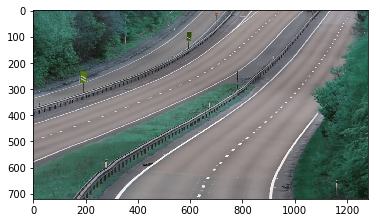

In [3]:
import numpy as np
import cv2
from skimage import data, filters
import matplotlib.pyplot as plt

# Open Video
cap = cv2.VideoCapture('road.mp4')
 
# Randomly select 25 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)
#print(int(frameIds))
# Store selected frames in an array
frames = []
for fid in frameIds : #range(int(frameIds)):
    #print(fid)
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    
 
# Display median frame
plt.imshow(medianFrame)
plt.show()
#cv2.waitKey(0)

In [5]:
medianFrame.shape

(720, 1280, 3)

In [9]:
# Reset frame number to 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
 
# Loop over all frames
ret = True

while(True):
 
    # Read frame
    ret, frame = cap.read()
    # Convert current frame to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and 
    # the median frame
    dframe = cv2.absdiff(frame, grayMedianFrame)
    # Treshold to binarize
    th, dframe = cv2.threshold(dframe, 70, 255, cv2.THRESH_BINARY)

    #w=50
    #h=50
            
    #contours, hier = cv2.findContours(dframe,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    #for cnt in contours:
        #if 300<cv2.contourArea(cnt):
            #pass
            #cv2.drawContours(dframe,[cnt],0,(0,255,0),2)
            #cv2.rectangle(dframe, (cnt[0][0][0], cnt[0][0][1]), (cnt[0][0][0]+w, cnt[0][0][1]+h), (255, 255, 255), 0)
    # Display image
    cv2.imshow('frame', dframe)
    cv2.waitKey(20)

# Release video object
cap.release()
 
# Destroy all windows
cv2.destroyAllWindows()

KeyboardInterrupt: 